# Practice 7
We're gonna work in two parts, first doing the KNN, then the decision tree:

## K-Nearest Neighbors
First, let's load everything.
Because we're only classifying the connections here, we only need to load them, not the people files.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



def load_files(csv_file="",npy_file=""): return pd.read_csv(csv_file), np.load(npy_file, allow_pickle=True)

In [35]:
connections, embeddings = load_files(csv_file="connections.csv", npy_file="connections_embeddings.npy")
print(embeddings.shape, connections.shape)
connections.head()

(10000, 256) (10000, 5)


array([[ 0.85610804, -1.19502062, -0.75200504, ...,  1.7817322 ,
        -0.42029483, -0.27403684],
       [ 1.33143264, -0.43402482,  0.90035635, ..., -0.92095585,
         0.90803239, -0.82448252],
       [-0.0207784 ,  0.72545354, -1.54455542, ..., -0.22326035,
        -1.6329649 ,  0.86262611],
       ...,
       [ 1.7173893 , -3.1846081 , -2.80543814, ..., -2.66040833,
         1.32202013, -0.79174905],
       [-0.02602249,  0.91715016,  1.20775965, ...,  0.77560959,
        -0.60378829,  1.01949501],
       [ 2.28478071,  3.67328578, -2.63366611, ..., -0.17494558,
        -1.70395007, -1.09514467]])

Now let's create a list of labels.

In [15]:
labels_list = [1 if connection_true else 0 for connection_true in connections['true_attempt']]
labels = np.array(labels_list) #we transform the list in a np.array to ease the next steps (idk why, but sklearn seems to like it...)

Now split the labels and embeddings into a train and a test sets

In [16]:
data_train, data_test, labels_train, labels_test = train_test_split(embeddings, labels, test_size=0.20, shuffle=True)
print(data_train.shape, data_test.shape, labels_train.shape, labels_test.shape)

(8000, 256) (2000, 256) (8000,) (2000,)


And now, let's train, test and evaluate our model! 
The KNN page can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

- To **train** the model, use the *fit* method.
- To **test** the model, use the *predict* method.
- To **evaluate** directly the performance, use the *score* method.

In [17]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(data_train, labels_train)
KNN.score(data_test, labels_test)

0.8985

What is the accuracy of your model? What happen if you increase of decrease the number of neighbors ?

Can we plot the graph showing the relation between number of neighbors and acccuracy using plt.plot?

100%|██████████| 29/29 [00:03<00:00,  8.64it/s]


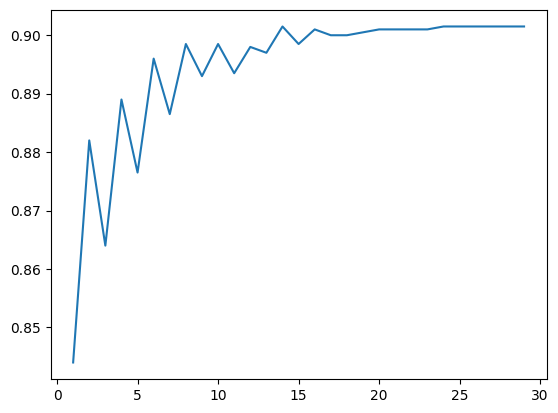

In [18]:

accuracies = []
neighbors = []
for N in tqdm(range(1,30)):
    KNN = KNeighborsClassifier(n_neighbors=N)
    KNN.fit(data_train, labels_train)
    score = KNN.score(data_test, labels_test)
    neighbors.append(N)
    accuracies.append(score)
    


plt.plot(neighbors, accuracies)
plt.show()

## Decision Tree Classifier
Now, let's do the same, but from the ips, and with a different classifier.
First, let's convert the ips to 4dimensional vectors.

You can use the function *split(".")*, that split a string into a list of strings, using the character given as a separator.
For example:
"hello, this is, a sentence.".split(",")
will output
["hello", " this is", " a sentence."]

you can use the function *float* to convert a string into a floating number

In [19]:
list_of_ips = list(connections['ips'])
list_of_vectors = []
for ip in list_of_ips:
    four_digits_as_str = ip.split('.')
    four_digits_as_floats = [float(digit) for digit in four_digits_as_str]
    list_of_vectors.append(four_digits_as_floats)
    
list_of_vectors = np.array(list_of_vectors)
print(f"Ip vectors extracted, shape={list_of_vectors.shape}")

Ip vectors extracted, shape=(10000, 4)


Now that you have the vectors and the labels, do the same as with the KNN:

1. split the train and test
2. train and evaluate your model
3. explore one or multiple of the following parameters:
    - max_depth
    - min_samples_split
    - min_samples_leaf

The page for the decision tree can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [20]:
labels_list = [1 if connection_true else 0 for connection_true in connections['true_attempt']]
data_train, data_test, labels_train, labels_test = train_test_split(list_of_vectors, labels, test_size=0.20, shuffle=True)
print(data_train.shape, data_test.shape, labels_train.shape, labels_test.shape)

(8000, 4) (2000, 4) (8000,) (2000,)


100%|██████████| 29/29 [00:00<00:00, 70.80it/s]


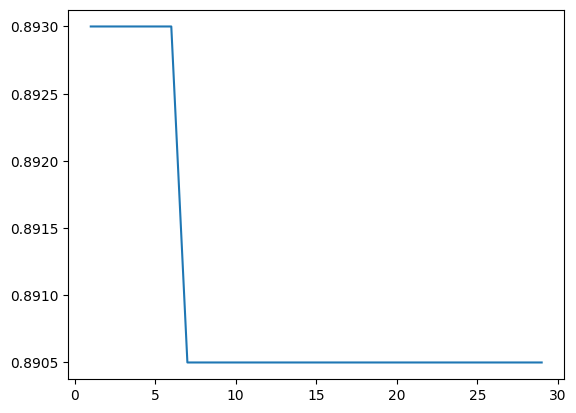

In [25]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
neighbors = []
for N in tqdm(range(1,30)):
    clf = DecisionTreeClassifier(max_depth=N)
    clf.fit(data_train, labels_train)
    score = clf.score(data_test, labels_test)
    neighbors.append(N)
    accuracies.append(score)
    


plt.plot(neighbors, accuracies)
plt.show()

100%|██████████| 29/29 [00:00<00:00, 63.94it/s]


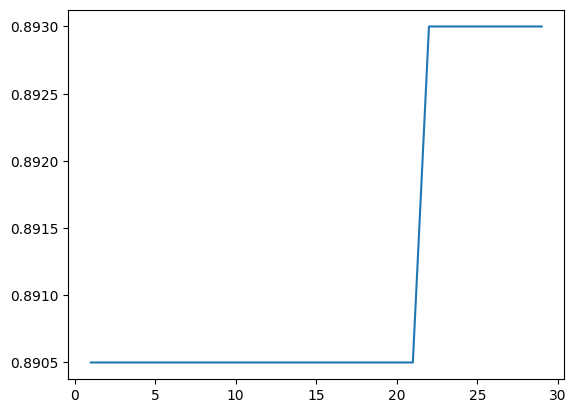

In [26]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
neighbors = []
for N in tqdm(range(1,30)):
    clf = DecisionTreeClassifier(min_samples_leaf=N)
    clf.fit(data_train, labels_train)
    score = clf.score(data_test, labels_test)
    neighbors.append(N)
    accuracies.append(score)
    


plt.plot(neighbors, accuracies)
plt.show()

100%|██████████| 48/48 [00:00<00:00, 62.31it/s]


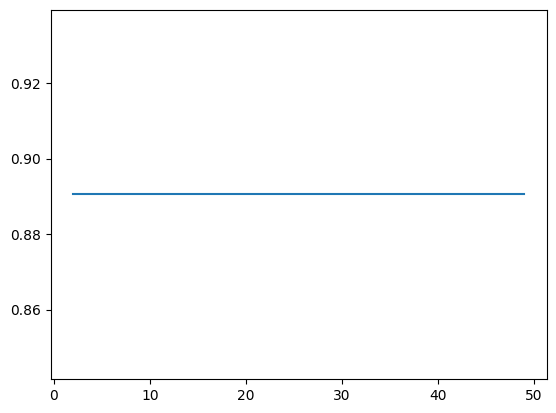

In [31]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
neighbors = []
for N in tqdm(range(2,50)):
    clf = DecisionTreeClassifier(min_samples_split=N)
    clf.fit(data_train, labels_train)
    score = clf.score(data_test, labels_test)
    neighbors.append(N)
    accuracies.append(score)
    


plt.plot(neighbors, accuracies)
plt.show()

In [36]:
print(connections)

# convert logins to a value via hashmap
logins = connections['login'].unique()
login_map = {}
for i in range(len(logins)):
    login_map[logins[i]] = i

connections['new_login'] = connections['login'].apply(lambda x: login_map[x])


                          logins     passwords              ips  \
0        malik_antonia@email.com  Spenc&r4Ever  170.252.165.242   
1         josue_mariam@email.com      03031974  193.251.224.173   
2        laila_delilah@email.com    LDE1ILAH76      34.5.41.175   
3      charles_eliyahu@email.com   PATRICK1985  132.245.193.248   
4          sade_miguel@email.com       pRw1wPP    34.113.135.64   
...                          ...           ...              ...   
9995     miriam_callie@email.com     NCA1LIE41   38.183.168.174   
9996     kaya_meshilem@email.com      06041980      190.4.12.45   
9997    jasmine_aileen@email.com      16051994    185.7.252.215   
9998  salvatore_bryant@email.com      JBRY@NT8   140.242.24.140   
9999       shaul_fiona@email.com      SFIONA65     45.81.243.20   

                    dates  true_attempt  
0     20:22:59 25-12-2020         False  
1     04:45:06 11-04-2022         False  
2     11:11:55 07-04-2023         False  
3     07:46:50 18-01-2022  

In [40]:
print(connections)

# convert logins to a value via hashmap
logins = connections['logins'].unique()
login_map = {}
for i in range(len(logins)):
    login_map[logins[i]] = i

connections['new_login'] = connections['logins'].apply(lambda x: login_map[x])

dates = connections['date'].unique()
date_map = {}
for i in 


                          logins     passwords              ips  \
0        malik_antonia@email.com  Spenc&r4Ever  170.252.165.242   
1         josue_mariam@email.com      03031974  193.251.224.173   
2        laila_delilah@email.com    LDE1ILAH76      34.5.41.175   
3      charles_eliyahu@email.com   PATRICK1985  132.245.193.248   
4          sade_miguel@email.com       pRw1wPP    34.113.135.64   
...                          ...           ...              ...   
9995     miriam_callie@email.com     NCA1LIE41   38.183.168.174   
9996     kaya_meshilem@email.com      06041980      190.4.12.45   
9997    jasmine_aileen@email.com      16051994    185.7.252.215   
9998  salvatore_bryant@email.com      JBRY@NT8   140.242.24.140   
9999       shaul_fiona@email.com      SFIONA65     45.81.243.20   

                    dates  true_attempt  
0     20:22:59 25-12-2020         False  
1     04:45:06 11-04-2022         False  
2     11:11:55 07-04-2023         False  
3     07:46:50 18-01-2022  

In [41]:
list_of_ips = list(connections['ips'])
list_of_emails = list(connections['new_login'])
list_of_vectors = []
for idx in range(len(list_of_ips)):
    four_digits_as_str = list_of_ips[idx].split('.')
    four_digits_as_floats = [float(digit) for digit in four_digits_as_str]
    four_digits_as_floats.append(list_of_emails[idx])
    list_of_vectors.append(four_digits_as_floats)
    
    
list_of_vectors = np.array(list_of_vectors)
print(f"Ip vectors extracted, shape={list_of_vectors.shape}")

Ip vectors extracted, shape=(10000, 5)


In [42]:
labels_list = [1 if connection_true else 0 for connection_true in connections['true_attempt']]
data_train, data_test, labels_train, labels_test = train_test_split(list_of_vectors, labels, test_size=0.20, shuffle=True)
print(data_train.shape, data_test.shape, labels_train.shape, labels_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


100%|██████████| 29/29 [00:00<00:00, 56.71it/s]


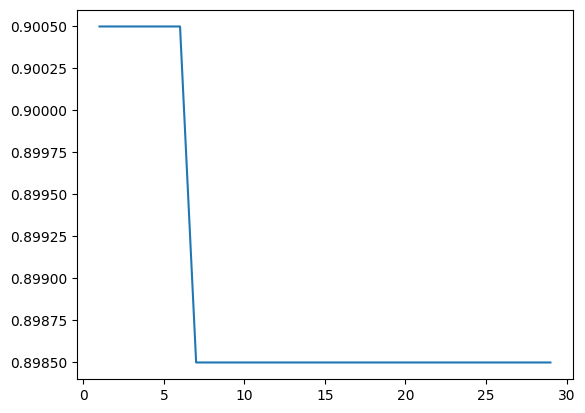

In [43]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
neighbors = []
for N in tqdm(range(1,30)):
    clf = DecisionTreeClassifier(max_depth=N)
    clf.fit(data_train, labels_train)
    score = clf.score(data_test, labels_test)
    neighbors.append(N)
    accuracies.append(score)
    


plt.plot(neighbors, accuracies)
plt.show()